## Introduction: Business Context
As a Data Scientist at SUMMUM, I was tasked with building an analytics dashboard to monitor our hotel's pricing strategy and market positioning. Our competitors, H1 and H2, operate in the same city, and we need to understand how our pricing compares. The goal is to analyze trends, optimize pricing, and stay competitive.

## Data Collection & Preparation 
(Main Hotel vs. Competitors H1 & H2)

Dataset 1: Main_Hotel_Pricing.csv → Prices, room types, and availability of our hotel
Dataset 2: Competitor1_Pricing.csv → H1’s prices and availability
Dataset 3: Competitor2_Pricing.csv → H2’s prices and availability
We collect price data for our hotel and competitors. This dataset includes room types, nightly rates, and availability over the past few weeks.

In [13]:
import os

print("Current Directory:", os.getcwd())

Current Directory: C:\Users\Mirela Giantaru\OneDrive\Desktop\PORTFOLIO_WORK_AND_DATASETS


In [14]:
os.chdir(r"C:\Users\Mirela Giantaru\OneDrive\Desktop\PORTFOLIO_WORK_AND_DATASETS")
print("New Directory:", os.getcwd())  # Verify the change


New Directory: C:\Users\Mirela Giantaru\OneDrive\Desktop\PORTFOLIO_WORK_AND_DATASETS


In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_main = pd.read_csv("Main_Hotel_Pricing.csv")
df_comp1 = pd.read_csv("Competitor1_Pricing.csv")
df_comp2 = pd.read_csv("Competitor2_Pricing.csv")

# Display the first few rows of each dataset
print("Main Hotel Data:\n", df_main.head(), "\n")
print("Competitor 1 Data:\n", df_comp1.head(), "\n")
print("Competitor 2 Data:\n", df_comp2.head(), "\n")

# Check for missing values
print("Missing values:\n")
print("Main Hotel:\n", df_main.isnull().sum(), "\n")
print("Competitor 1:\n", df_comp1.isnull().sum(), "\n")
print("Competitor 2:\n", df_comp2.isnull().sum(), "\n")


Main Hotel Data:
          date  hotel_name room_type  price_per_night availability
0  2025-03-17  Main Hotel  Standard              100    Available
1  2025-03-16  Main Hotel    Deluxe              150         Full
2  2025-03-15  Main Hotel     Suite              250    Available
3  2025-03-14  Main Hotel  Standard              110    Available
4  2025-03-13  Main Hotel    Deluxe              145         Full 

Competitor 1 Data:
          date hotel_name room_type  price_per_night availability
0  2025-03-17   H1 Hotel  Standard               95         Full
1  2025-03-16   H1 Hotel    Deluxe              160    Available
2  2025-03-15   H1 Hotel     Suite              245    Available
3  2025-03-14   H1 Hotel  Standard              100    Available
4  2025-03-13   H1 Hotel    Deluxe              150         Full 

Competitor 2 Data:
          date hotel_name room_type  price_per_night availability
0  2025-03-17   H2 Hotel  Standard              105    Available
1  2025-03-16   H2 Hot

In [16]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             10 non-null     object
 1   hotel_name       10 non-null     object
 2   room_type        10 non-null     object
 3   price_per_night  10 non-null     int64 
 4   availability     10 non-null     object
dtypes: int64(1), object(4)
memory usage: 528.0+ bytes


In [17]:
df_main.describe()

,price_per_night
count,10.000000
mean,165.000000
std,64.935866
min,100.000000
25%,112.500000
50%,147.500000
75%,226.250000
max,260.000000


## Creating a boxplot to visually compare price ranges across competitors.

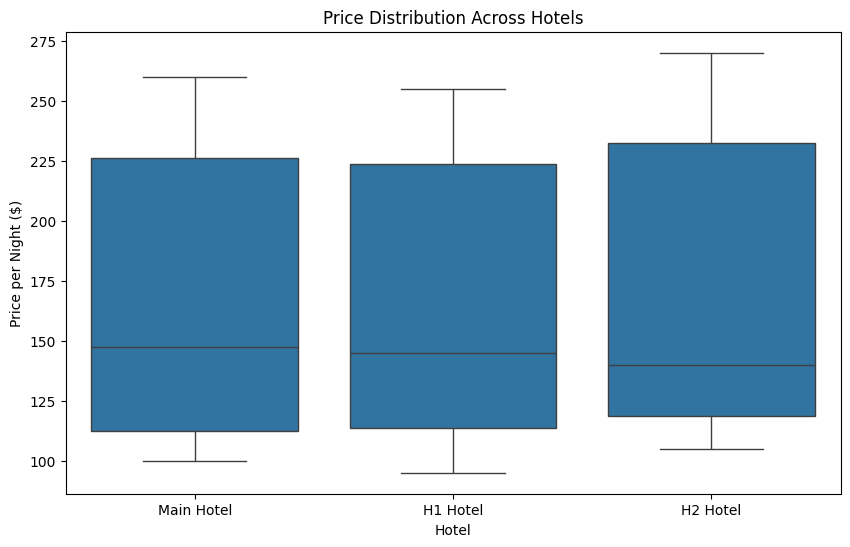

In [18]:
# Hotels adjust their prices dynamically based on demand, seasonality, and competitor movements. Let's analyze how our hotel's prices fluctuate compared to competitors.

# Combine data for comparison
df_main["hotel_type"] = "Main Hotel"
df_comp1["hotel_type"] = "H1 Hotel"
df_comp2["hotel_type"] = "H2 Hotel"

df_all = pd.concat([df_main, df_comp1, df_comp2])

# Boxplot comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x="hotel_type", y="price_per_night", data=df_all)
plt.title("Price Distribution Across Hotels")
plt.xlabel("Hotel")
plt.ylabel("Price per Night ($)")
plt.show()


## Exploratory Data Analysis (EDA): Understanding Pricing Trends
We begin by visualizing pricing distributions, checking how our hotel compares to competitors, and identifying pricing gaps. The data will guide our revenue optimization strategy.
Here I visualize price distributions (histograms, boxplots); Compare pricing trends over time (line plots); Identify price gaps between our hotel and competitors

## Ploting how each hotel's prices change over time, helping us detect pricing trends and seasonal fluctuations.

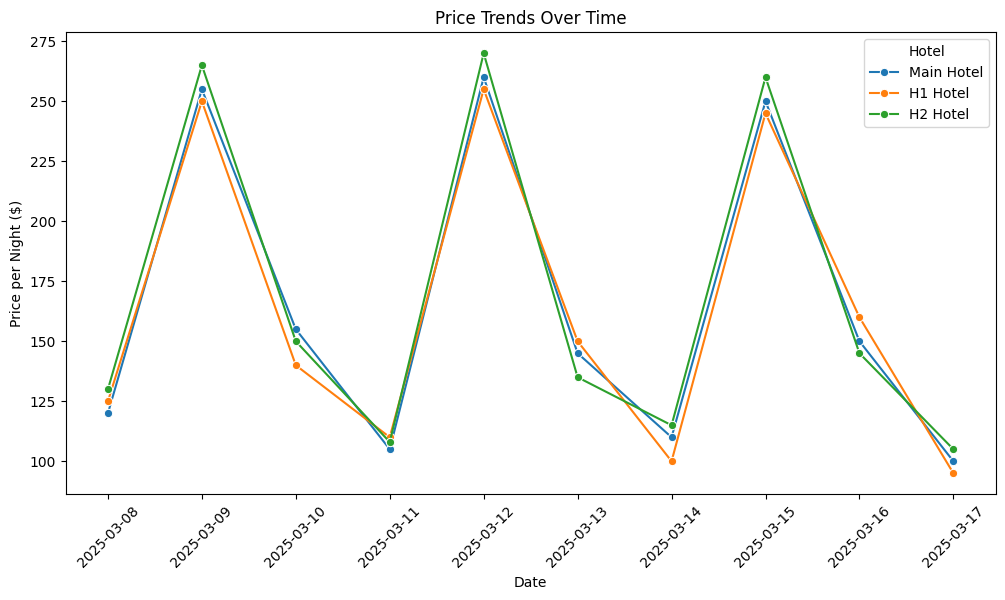

In [19]:
# Convert 'date' column to datetime format
df_all["date"] = pd.to_datetime(df_all["date"])

# Line plot for price trends
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="price_per_night", hue="hotel_type", data=df_all, marker="o")
plt.xticks(rotation=45)
plt.title("Price Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Price per Night ($)")
plt.legend(title="Hotel")
plt.show()


## To gain a competitive advantage, we identify pricing gaps between our hotel and competitors. This allows us to adjust pricing strategies accordingly.

         date room_type  price_per_night  competitor1_diff  competitor2_diff
0  2025-03-17  Standard              100                 5                -5
1  2025-03-16    Deluxe              150               -10                 5
2  2025-03-15     Suite              250                 5               -10
3  2025-03-14  Standard              110                10                -5
4  2025-03-13    Deluxe              145                -5                10


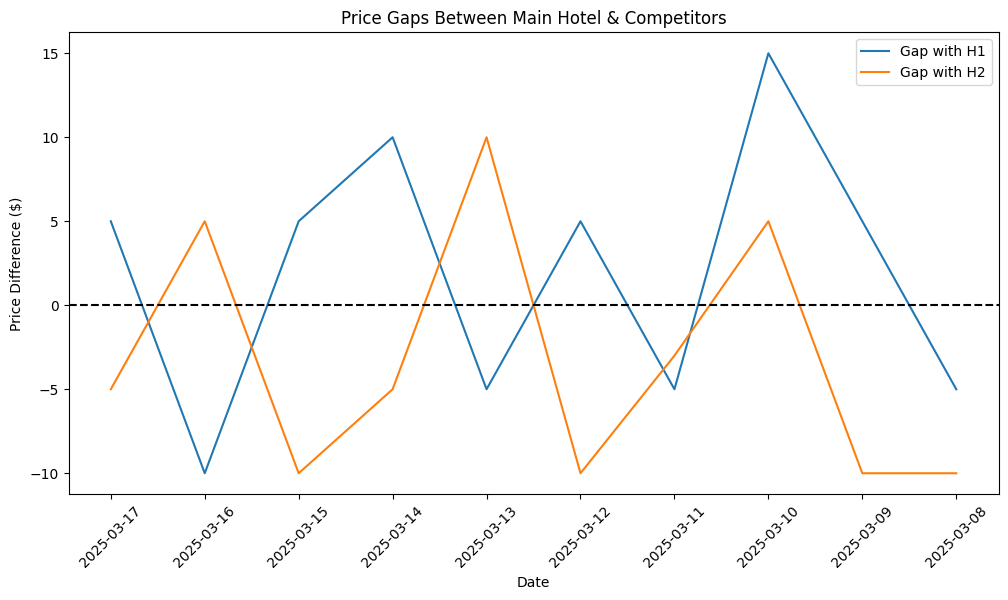

In [20]:
# Calculate price differences
df_main["competitor1_diff"] = df_main["price_per_night"] - df_comp1["price_per_night"]
df_main["competitor2_diff"] = df_main["price_per_night"] - df_comp2["price_per_night"]

# Display summary
price_differences = df_main[["date", "room_type", "price_per_night", "competitor1_diff", "competitor2_diff"]]
print(price_differences.head())

# Visualize price gaps
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="competitor1_diff", data=df_main, label="Gap with H1")
sns.lineplot(x="date", y="competitor2_diff", data=df_main, label="Gap with H2")
plt.xticks(rotation=45)
plt.axhline(y=0, color="black", linestyle="--")  # Reference line
plt.title("Price Gaps Between Main Hotel & Competitors")
plt.xlabel("Date")
plt.ylabel("Price Difference ($)")
plt.legend()
plt.show()


## Using historical data, we predict future demand and adjust prices accordingly.

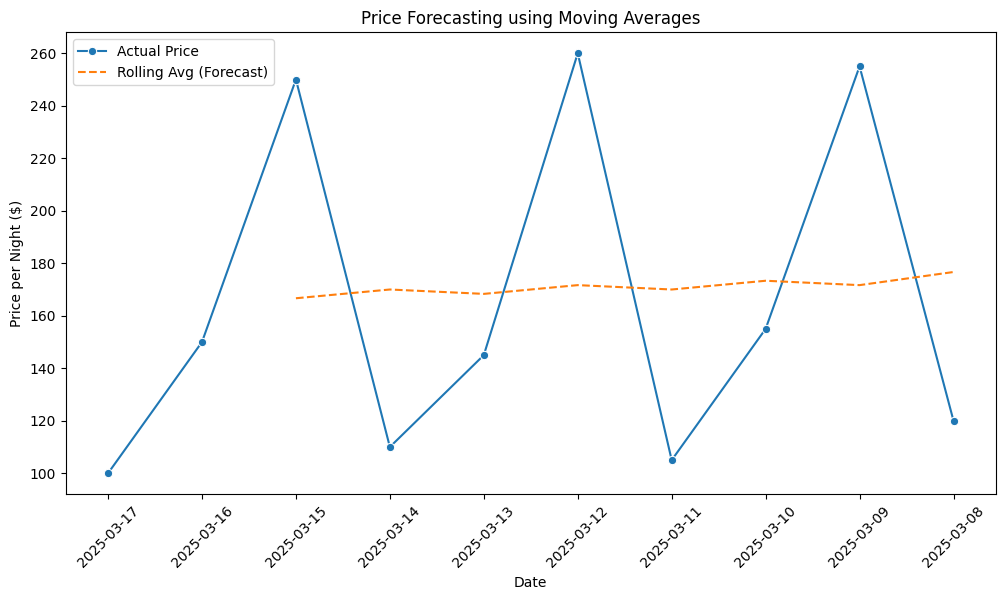

In [21]:
#Uses moving averages to smooth price trends and estimate future pricing behavior.

# Simulate basic demand forecasting (Moving Average)
df_main["rolling_avg_price"] = df_main["price_per_night"].rolling(window=3).mean()

# Plot moving average
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="price_per_night", data=df_main, label="Actual Price", marker="o")
sns.lineplot(x="date", y="rolling_avg_price", data=df_main, label="Rolling Avg (Forecast)", linestyle="--")
plt.xticks(rotation=45)
plt.title("Price Forecasting using Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price per Night ($)")
plt.legend()
plt.show()


## How to Dynamically Monitor the Market?
To stay competitive, we need an automated way to assess market conditions. This can be done by continuously monitoring price trends and adjusting our pricing strategy accordingly.  

## Set price thresholds – If competitors lower prices, adjust ours dynamically.
## Monitor demand trends – Increase prices during high-demand periods.
## Automate alerts – Detect when our prices are too high or too low.

If our price is more than $20 higher than competitors, we reduce it by 5%.  
If our price is $10 or more below competitors, we increase it by 5%.
Otherwise, the price remains unchanged.

In [22]:
# Adjust pricing dynamically based on competitor trends
def adjust_pricing(row):
    if row["competitor1_diff"] > 20 or row["competitor2_diff"] > 20:
        return row["price_per_night"] * 0.95  # Lower price by 5%
    elif row["competitor1_diff"] < -10 or row["competitor2_diff"] < -10:
        return row["price_per_night"] * 1.05  # Increase price by 5%
    return row["price_per_night"]

df_main["adjusted_price"] = df_main.apply(adjust_pricing, axis=1)

# Show adjusted prices
print(df_main[["date", "room_type", "price_per_night", "adjusted_price"]].head())


         date room_type  price_per_night  adjusted_price
0  2025-03-17  Standard              100             100
1  2025-03-16    Deluxe              150             150
2  2025-03-15     Suite              250             250
3  2025-03-14  Standard              110             110
4  2025-03-13    Deluxe              145             145


## Summary and Final Report
In this project, we analyzed hotel pricing trends using structured datasets. We visualized competitor price distributions, identified pricing gaps, and implemented basic demand forecasting.
Finally, we simulated a dynamic pricing adjustment mechanism to ensure market competitiveness.

To stay competitive, we need an automated way to assess market conditions. This can be done by continuously monitoring price trends and adjusting our pricing strategy accordingly.  

## Additional Steps and Follow Up


If we had historical booking data, we could:
Test different thresholds ($15 instead of $20, or $7 instead of $10).
Use A/B testing to see which strategy maximizes revenue.
Apply machine learning models to predict optimal price points.


## How to Dynamically Monitor the Market?

Set price thresholds – If competitors lower prices, adjust ours dynamically.
Monitor demand trends – Increase prices during high-demand periods.
Automate alerts – Detect when our prices are too high or too low.

If our price is more than $20 higher than competitors, we reduce it by 5%.  If our price is $10 or more below competitors, we increase it by 5%.
Otherwise, the price remains unchanged.

 ## Why Use Thresholds of $20 and  $10?
These values were chosen based on business logic and industry best practices:

  ## Why lower the price when we're $20+ more expensive?

Customers are likely to choose a competitor if our hotel is significantly more expensive.
By lowering our price by 5%, we become more competitive while still maintaining revenue.
 ## Why increase the price when we're $10+ cheaper?